In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from nlp import preprocessing as pp
import nltk
print("imported successfully")

imported successfully


In [14]:
df = pd.read_csv('data/cefr_readings.csv')

In [15]:
df.head()

,documents,cefr_level
0,The Long Night This is David Reilly's first bo...,A2
1,Most house burglaries happen between 2 p.m. an...,A2
2,One very famous place for tourists in London i...,A2
3,To: All staff Subject: Holidays From: D Brown ...,A2
4,Canada Geese are large blue and white birds. W...,A2


#### This is the original data frame broken up into individual sentences: 
The original Naive Bayes experiment can be found below using each individual document or reading from the Cambridge Readability Data Set

In [16]:
sent_df = pp.get_sentences(df, 'documents', 'cefr_level')
new_df = pd.DataFrame.from_records(sent_df, columns=['text', 'num_of_sent', 'avg_len_word', 'level', 'doc_id'])

In [17]:
new_df

,text,num_of_sent,avg_len_word,level,doc_id
0,The Long Night This is David Reilly's first book.,10,3.90,A2,0
1,David became a writer after teaching English f...,10,5.30,A2,0
2,"Maha is a nurse in northern Australia, where s...",14,4.29,A2,0
3,One day a baby is so ill that Maha has to driv...,22,3.23,A2,0
4,They have a lot of problems getting there and ...,19,4.47,A2,0
...,...,...,...,...,...
9532,It seems that a bunch of scientists are gettin...,30,4.63,C2,330
9533,Sure we all know its the age-old quest for kno...,23,4.26,C2,330
9534,But what these guys want to know is why we wan...,31,3.42,C2,330
9535,"Surely, it's more important to know whether wh...",28,4.18,C2,330


#### New Attempt at Naive Bayes using each sentence as a data point

In [18]:
df_processed =  pp.preprocess_all(new_df, 'text')

In [19]:
df_processed.head()

,text,num_of_sent,avg_len_word,level,doc_id,text_clean,Lemmatized,Stemmed
0,The Long Night This is David Reilly's first book.,10,3.90,A2,0,long night david first book,long night david first book,long night david first book
1,David became a writer after teaching English f...,10,5.30,A2,0,david became writer teaching english several y...,david became writer teaching english several year,david becam writer teach english sever year
2,"Maha is a nurse in northern Australia, where s...",14,4.29,A2,0,maha nurse northern australia works small hosp...,maha nurse northern australia work small hospital,maha nurs northern australia work small hospit
3,One day a baby is so ill that Maha has to driv...,22,3.23,A2,0,one day baby ill maha drive night get nearest ...,one day baby ill maha drive night get nearest ...,one day babi ill maha drive night get nearest ...
4,They have a lot of problems getting there and ...,19,4.47,A2,0,lot problems getting hard work exciting story ...,lot problem getting hard work exciting story j...,lot problem get hard work excit stori joanna t...


In [20]:
data = df_processed[['Lemmatized','level']]

In [21]:
data

,Lemmatized,level
0,long night david first book,A2
1,david became writer teaching english several year,A2
2,maha nurse northern australia work small hospital,A2
3,one day baby ill maha drive night get nearest ...,A2
4,lot problem getting hard work exciting story j...,A2
...,...,...
9532,seems bunch scientist getting hot collar drive...,C2
9533,sure know quest knowledge desire understand ev...,C2
9534,guy want know want know first place science ex...,C2
9535,surely important know whether scientist right ...,C2


#### Data prepared for testing with one feature-- Lemmatized data to be vectorized into bag of words

In [22]:
documents = data.Lemmatized
target = data.level

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(documents, target, test_size=0.3, random_state=29)

In [23]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()

X_train_vectors = cv.fit_transform(X_train).toarray()
X_test_vectors = cv.transform(X_test).toarray()
# print(X_train_vectors)

In [24]:
cv.vocabulary_

{'terribly': 8937,
 'lucky': 5325,
 'child': 1532,
 'week': 9789,
 'warned': 9723,
 'girl': 3832,
 'cheeky': 1507,
 'ignorance': 4413,
 'thought': 9021,
 'could': 2060,
 'handle': 4074,
 'watch': 9743,
 'constantly': 1929,
 'considering': 1918,
 'margaret': 5454,
 'start': 8441,
 'look': 5284,
 'water': 9747,
 'piece': 6539,
 'furniture': 3731,
 'making': 5398,
 'statement': 8449,
 'experienced': 3230,
 'globewise': 3865,
 'tour': 9142,
 'manager': 5416,
 'stage': 8416,
 'trip': 9240,
 'martin': 5479,
 'fern': 3409,
 'editor': 2876,
 'page': 6277,
 'daily': 2230,
 'newspaper': 5929,
 'one': 6117,
 'le': 5091,
 'difficult': 2517,
 'task': 8859,
 'sample': 7714,
 'offer': 6080,
 'finest': 3454,
 'restaurant': 7460,
 'green': 3968,
 'place': 6562,
 'gradually': 3924,
 'taken': 8823,
 'farmer': 3350,
 'result': 7470,
 'three': 9031,
 'plant': 6577,
 'wheat': 9823,
 'rice': 7534,
 'maize': 5391,
 'provide': 6953,
 'half': 4053,
 'calorie': 1296,
 'consumed': 1942,
 'human': 4350,
 'race': 7

In [25]:
X_train_vectors.shape

(6675, 10023)

In [26]:
X_test_vectors.shape

(2862, 10023)

In [27]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

y_train_labels = le.fit_transform(y_train)
y_test_labels = le.transform(y_test)

In [28]:
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import MultinomialNB

pipe_nb = make_pipeline(CountVectorizer(), MultinomialNB())
pipe_nb.fit(X_train, y_train)
print("Training Acc.: ", pipe_nb.score(X_train, y_train))
print("Valid Acc.: ", pipe_nb.score(X_test, y_test))

Training Acc.:  0.793558052434457
Valid Acc.:  0.5111809923130678


In [29]:
# Re-do the test after cross-validation

from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_validate

nb = MultinomialNB()

cv_results = cross_validate(nb, X_train_vectors, y_train_labels, cv=10) 
sorted(cv_results.keys())

cv_results['test_score']

array([0.46107784, 0.50449102, 0.48802395, 0.49101796, 0.49251497,
       0.43778111, 0.49025487, 0.49775112, 0.46776612, 0.47526237])

In [30]:
nb.fit(X_train_vectors, y_train_labels)

MultinomialNB()

In [31]:
# Confirm: same result as the pipeline

print("Training Acc.: ", nb.score(X_train_vectors, y_train_labels))
print("Valid Acc.: ", nb.score(X_test_vectors, y_test_labels))

Training Acc.:  0.793558052434457
Valid Acc.:  0.5111809923130678


In [32]:
test_pred = nb.predict(X_test_vectors)

In [33]:
nb.classes_

array([0, 1, 2, 3, 4])

Confusion Matrix


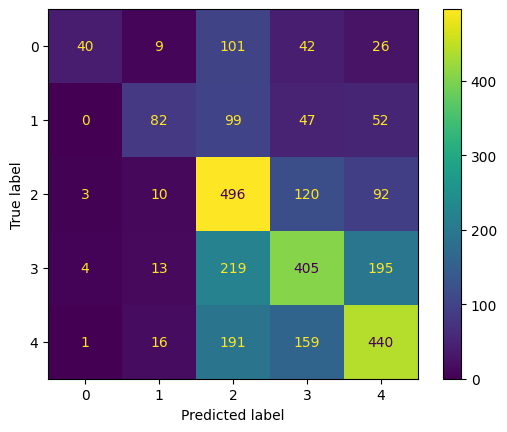

In [34]:
from sklearn.metrics import f1_score, classification_report, accuracy_score 
from sklearn.metrics import RocCurveDisplay
from sklearn import metrics

print('Confusion Matrix')


cm = metrics.confusion_matrix(y_test_labels, test_pred, labels=nb.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=nb.classes_)
disp.plot()
plt.show()

In [35]:
print(classification_report(y_test_labels, test_pred))

              precision    recall  f1-score   support

           0       0.83      0.18      0.30       218
           1       0.63      0.29      0.40       280
           2       0.45      0.69      0.54       721
           3       0.52      0.48      0.50       836
           4       0.55      0.55      0.55       807

    accuracy                           0.51      2862
   macro avg       0.60      0.44      0.46      2862
weighted avg       0.55      0.51      0.50      2862



## Original Naive Attempt using full documents

In [36]:
df_processed =  pp.preprocess_all(df, 'documents')

In [37]:
data = df_processed[['Lemmatized','cefr_level']]

In [38]:
data.head()

,Lemmatized,cefr_level
0,long night david first book david became write...,A2
1,house burglary happen police inspector ian sau...,A2
2,one famous place tourist london madame museum ...,A2
3,staff subject holiday brown date planning holi...,A2
4,canada goose large blue white bird autumn arri...,A2


In [39]:
documents = data.Lemmatized
target = data.cefr_level

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(documents, target, test_size=0.3, random_state=29 )

In [40]:
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import MultinomialNB

pipe_nb = make_pipeline(CountVectorizer(), MultinomialNB())
pipe_nb.fit(X_train, y_train)
print("Training Acc.: ", pipe_nb.score(X_train,y_train))
print("Valid Acc.: ", pipe_nb.score(X_test,y_test))

Training Acc.:  0.9696969696969697
Valid Acc.:  0.35


In [41]:
test_pred = pipe_nb.predict(X_test)

Confusion Matrix


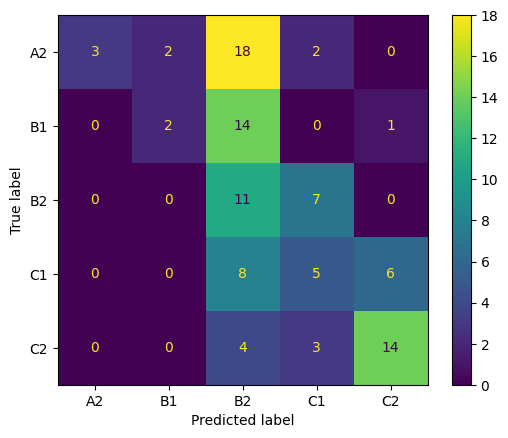

In [42]:
print('Confusion Matrix')

cm = metrics.confusion_matrix(y_test, test_pred, labels=pipe_nb.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=pipe_nb.classes_)
disp.plot()
plt.show()

In [43]:
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

          A2       1.00      0.12      0.21        25
          B1       0.50      0.12      0.19        17
          B2       0.20      0.61      0.30        18
          C1       0.29      0.26      0.28        19
          C2       0.67      0.67      0.67        21

    accuracy                           0.35       100
   macro avg       0.53      0.36      0.33       100
weighted avg       0.57      0.35      0.33       100



#### confusion matrix for the training data to see the overfitting

In [44]:
train_pred = pipe_nb.predict(X_train)

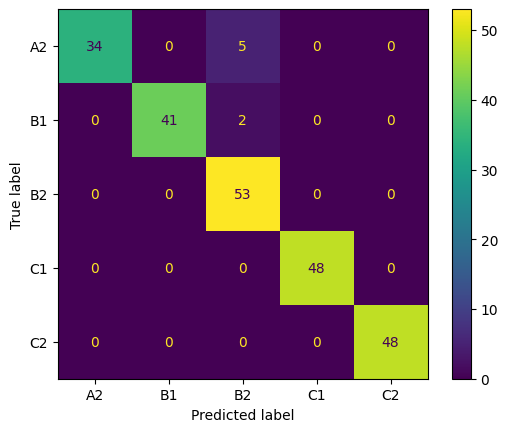

In [45]:
cm = metrics.confusion_matrix(y_train, train_pred, labels=pipe_nb.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=pipe_nb.classes_)
disp.plot()
plt.show()

### Three Book Excerpts for testing

In [46]:
# Twighlight Excerpt
twilight = "Tyler, trying to win back her attention, asked Lauren's opinion on a CD he held. She was distracted. I stared at the \
deep-voiced boy, taken aback, but he was looking away toward the dark forest behind us. He'd said that the Cullens didn't come here, \
but his tone had implied something more—that they weren't allowed; they were prohibited. His manner left a strange impression on me, \
and I tried toignore it without success."

In [47]:
# Great Gatsby Excerpt
gg = "He smiled understandingly-much more than understandingly. It was one of those rare smiles with a quality of eternal reassurance \
in it, that you may come across four or five times in life. It faced--or seemed to face--the whole eternal world for an instant, and \
then concentrated on you with an irresistible prejudice in your favor. It understood you just as far as you wanted to be understood, \
believed in you as you would like to believe in yourself, and assured you that it had precisely the impression of you that, at your \
best, you hoped to convey"

In [48]:
# Charlie and the Chocolate Factory Exerpt
cc = "Mr Willy Wonka can make marshmallows that taste of violets, and rich caramels that change colour every ten seconds as you suck \
them, and little feathery sweets that melt away deliciously the moment you put them between your lips. He can make chewing-gum that \
never loses its taste, and sugar balloons that you can blow up to enormous sizes before you pop them with a pin and gobble them up. \
And, by a most secret method, he can make lovely blue birds' eggs with black spots on them, and when you put one of these in your \
mouth, it gradually gets smaller and smaller until suddenly there is nothing left except a tiny little DARKRED sugary baby bird \
sitting on the tip of your tongue."

Process each excerpt in the same way as the original data

In [49]:
cc_cleaned= pp.remove_stopwords(pp.to_lower(pp.remove_punct(cc)))
charlie_test = pp.lemmatization(cc_cleaned)

In [50]:
charlie_test

'mr willy wonka make marshmallow taste violet rich caramel change colour every ten second suck little feathery sweet melt away deliciously moment put lip make chewing gum never loses taste sugar balloon blow enormous size pop pin gobble secret method make lovely blue bird egg black spot put one mouth gradually get smaller smaller suddenly nothing left except tiny little darkred sugary baby bird sitting tip tongue'

In [51]:
gg_cleaned= pp.remove_stopwords(pp.to_lower(pp.remove_punct(gg)))
gatsby_test = pp.lemmatization(gg_cleaned)

In [52]:
twil_cleaned= pp.remove_stopwords(pp.to_lower(pp.remove_punct(twilight)))
twilight_test = pp.lemmatization(twil_cleaned)

In [53]:
# Predict the three test points
print(pipe_nb.predict([charlie_test]))
print(pipe_nb.predict([gatsby_test]))
print(pipe_nb.predict([twilight_test]))

['B2']
['C2']
['B2']


NameError: name 'kk_test' is not defined

#### One versus the Rest experiment with vectorized data

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression

pipe_nb = make_pipeline(CountVectorizer(), OneVsRestClassifier(LogisticRegression(max_iter=1000)))
pipe_nb.fit(X_train, y_train)
print("Training Acc.: ", pipe_nb.score(X_train, y_train))
print("Valid Acc.: ", pipe_nb.score(X_test, y_test))

Training Acc.:  1.0
Valid Acc.:  0.58


In [ ]:
test_pred = pipe_nb.predict(X_test)

Confusion Matrix


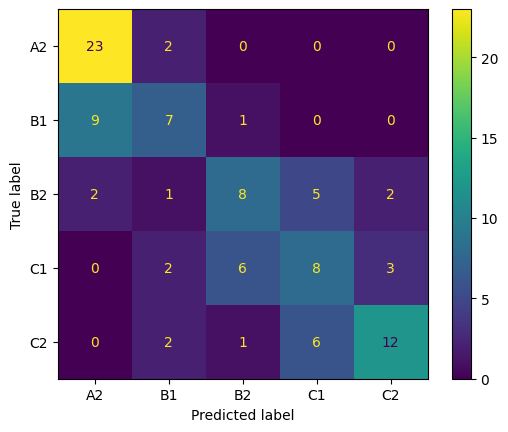

In [ ]:
print('Confusion Matrix')

cm = metrics.confusion_matrix(y_test, test_pred, labels=pipe_nb.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=pipe_nb.classes_)
disp.plot()
plt.show()